In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('ModelData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4557 entries, 0 to 4556
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     4557 non-null   object 
 1   CountryCode                 4557 non-null   object 
 2   Year                        4557 non-null   int64  
 3   CleanFuelAccess             3969 non-null   float64
 4   ElectricityAccess           4490 non-null   float64
 5   CO2Emissions                4011 non-null   float64
 6   ElecPowerConsumption        2118 non-null   float64
 7   CoalElectricity             2239 non-null   float64
 8   HydroElectricity            2239 non-null   float64
 9   GasElectricity              2239 non-null   float64
 10  NuclearElectricity          2132 non-null   float64
 11  OilElectricity              2239 non-null   float64
 12  RenewableElectricity        2239 non-null   float64
 13  RenewableElectricity_kWh    2239 

In [ ]:
print("Veri boyutu:", df.shape)
print("Veri sütunları:", df.columns.tolist())

Veri boyutu: (4557, 28)
Veri sütunları: ['Country', 'CountryCode', 'Year', 'CleanFuelAccess', 'ElectricityAccess', 'CO2Emissions', 'ElecPowerConsumption', 'CoalElectricity', 'HydroElectricity', 'GasElectricity', 'NuclearElectricity', 'OilElectricity', 'RenewableElectricity', 'RenewableElectricity_kWh', 'EnergyIntensity', 'EnergyUse', 'FossilFuelConsumption', 'GDPGrowth', 'GDPPerCapita', 'PrivateEnergyInvest', 'LandArea', 'PopDensity', 'TotalPopulation', 'PPP_EnergyInvest', 'RenewableEnergyConsumption', 'TotalGHGEmissions', 'Latitude', 'Longitude']


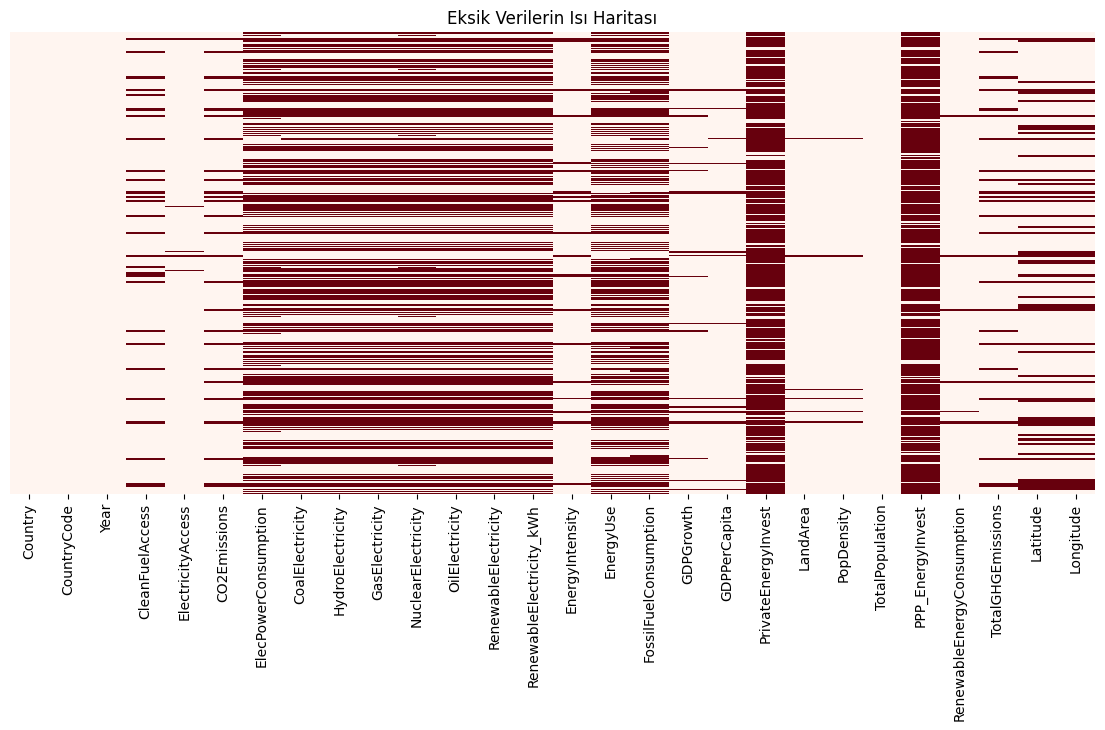

In [ ]:
#Eksik veri ısı haritası
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="Reds")
plt.title("Eksik Verilerin Isı Haritası")
plt.show()

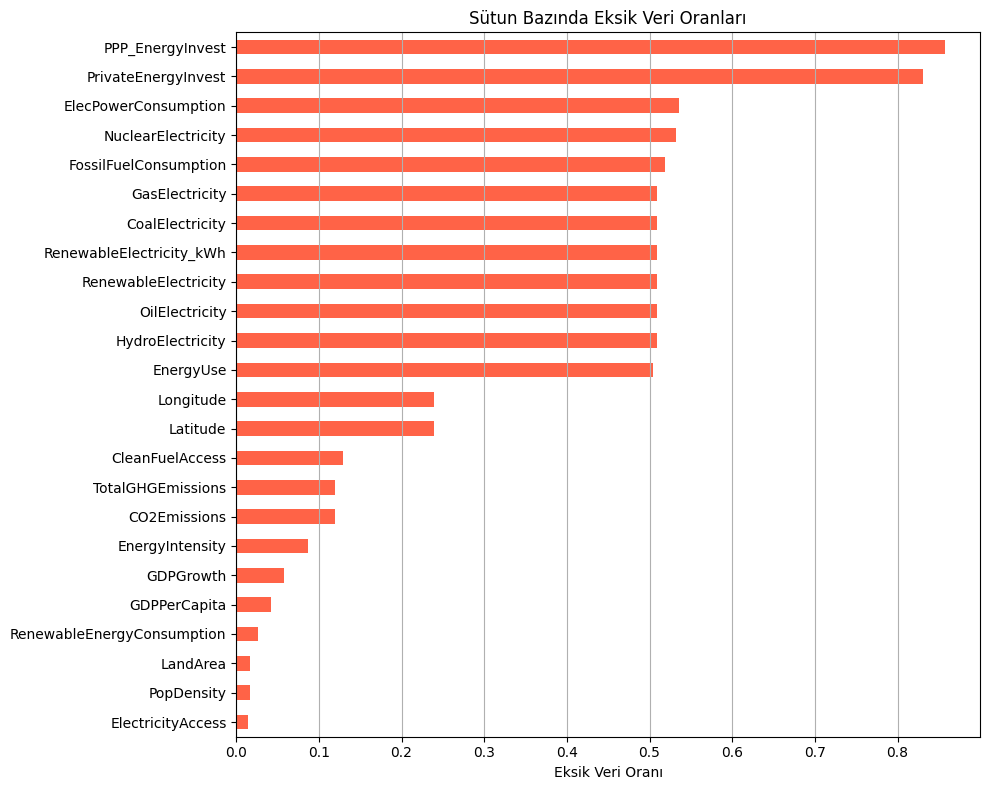

In [ ]:

missing_ratio = df.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_ratio[missing_ratio > 0].plot(kind='barh', color='tomato')
plt.xlabel("Eksik Veri Oranı")
plt.title("Sütun Bazında Eksik Veri Oranları")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
# Eksik veri oranları
missing_data = df.isnull().sum() / len(df) * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data


,0
PPP_EnergyInvest,85.692341
PrivateEnergyInvest,83.102919
ElecPowerConsumption,53.522054
NuclearElectricity,53.214834
FossilFuelConsumption,51.854290
GasElectricity,50.866798
CoalElectricity,50.866798
HydroElectricity,50.866798
RenewableElectricity_kWh,50.866798
RenewableElectricity,50.866798


In [ ]:
#K-Nearest Neighbors (KNN) Imputation


cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_cols
numeric = [col for col in df.columns if col not in cat_cols]
data_numeric = df[numeric]
data_numeric.head()

,Year,CleanFuelAccess,ElectricityAccess,CO2Emissions,ElecPowerConsumption,CoalElectricity,HydroElectricity,GasElectricity,NuclearElectricity,OilElectricity,...,GDPPerCapita,PrivateEnergyInvest,LandArea,PopDensity,TotalPopulation,PPP_EnergyInvest,RenewableEnergyConsumption,TotalGHGEmissions,Latitude,Longitude
0,2000,6.7,4.446891,0.055167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,652230.0,29.963329,19542982,NaN,44.99,14205.32527,33.93911,67.709953
1,2001,7.7,9.294527,0.055293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,652230.0,30.186640,19688632,NaN,45.60,12604.75975,33.93911,67.709953
2,2002,8.8,14.133616,0.066810,NaN,NaN,NaN,NaN,NaN,NaN,...,183.532775,NaN,652230.0,32.197624,21000256,NaN,37.83,15255.39353,33.93911,67.709953
3,2003,10.0,18.971165,0.073005,NaN,NaN,NaN,NaN,NaN,NaN,...,200.462376,1580000.0,652230.0,34.719547,22645130,1580000.0,36.66,15961.03270,33.93911,67.709953
4,2004,11.1,23.814182,0.054867,NaN,NaN,NaN,NaN,NaN,NaN,...,221.657662,NaN,652230.0,36.112339,23553551,NaN,44.24,15572.01238,33.93911,67.709953


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

data_imputed = imputer.fit_transform(data_numeric)
data_imputed = pd.DataFrame(data_imputed, columns=data_numeric.columns)


df[data_numeric.columns] = data_imputed
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

data_imputed.isnull().sum()

,0
Year,0
CleanFuelAccess,0
ElectricityAccess,0
CO2Emissions,0
ElecPowerConsumption,0
CoalElectricity,0
HydroElectricity,0
GasElectricity,0
NuclearElectricity,0
OilElectricity,0


In [ ]:
df.to_csv('cleaned_data.csv', index=False)
print(" Temizlenmiş veri cleaned_data.csv dosyasına kaydedildi.")

 Temizlenmiş veri cleaned_data.csv dosyasına kaydedildi.


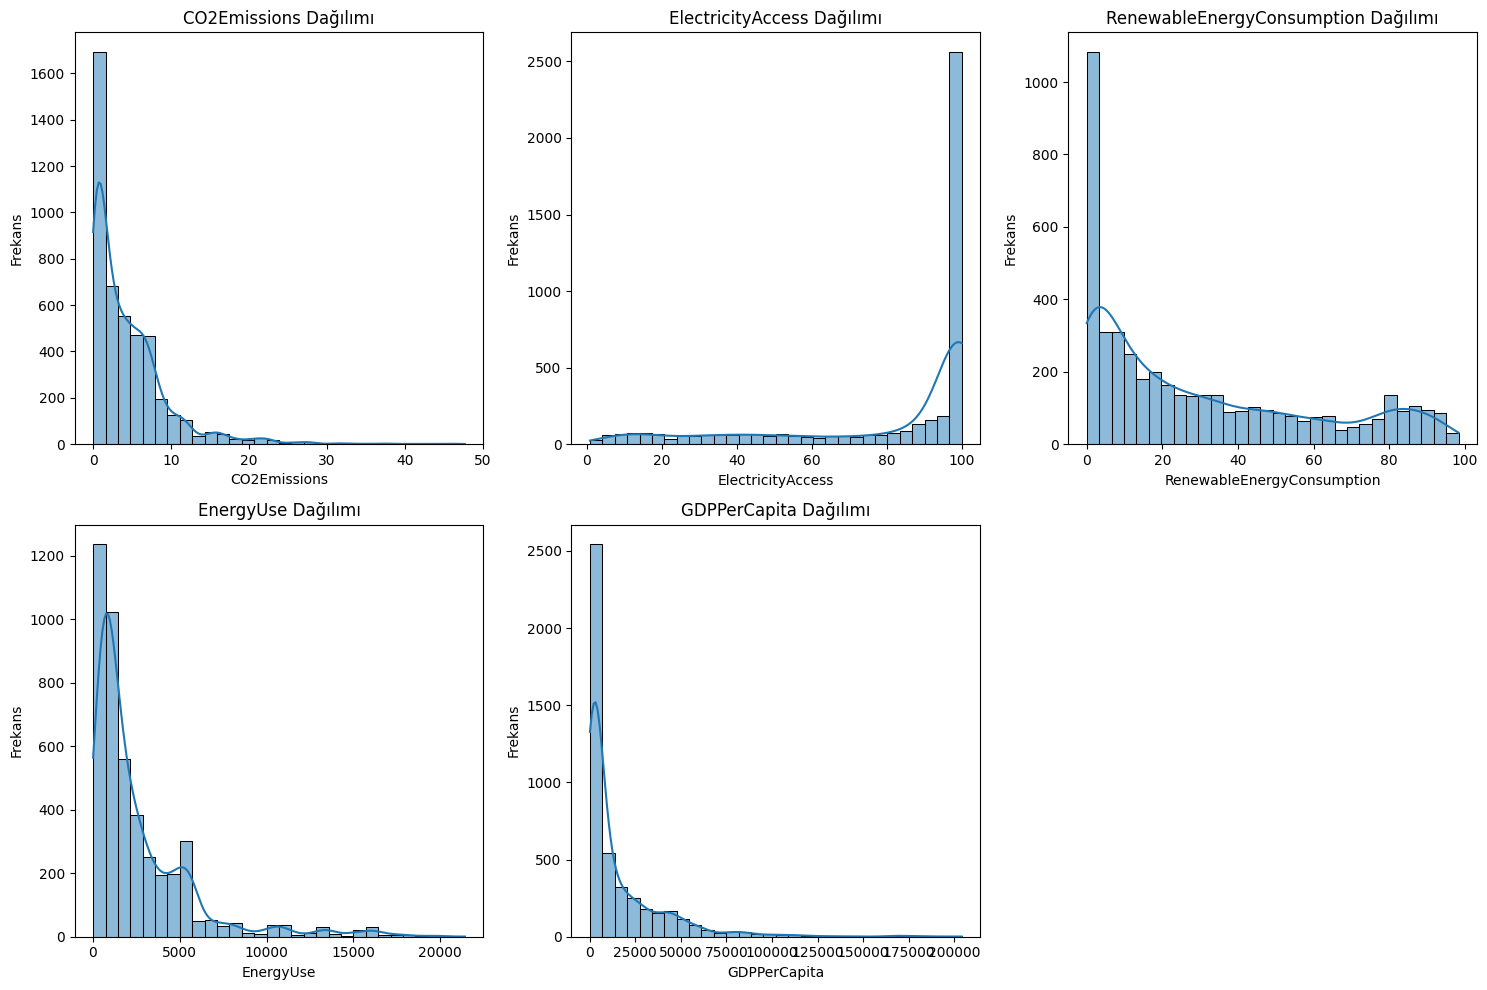

In [ ]:
columns_to_visualize = [
    'CO2Emissions',
    'ElectricityAccess',
    'RenewableEnergyConsumption',
    'EnergyUse',
    'GDPPerCapita'
]

# Histogram ve KDE grafikleri
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'{col} Dağılımı')
    plt.xlabel(col)
    plt.ylabel("Frekans")
plt.tight_layout()
plt.show()

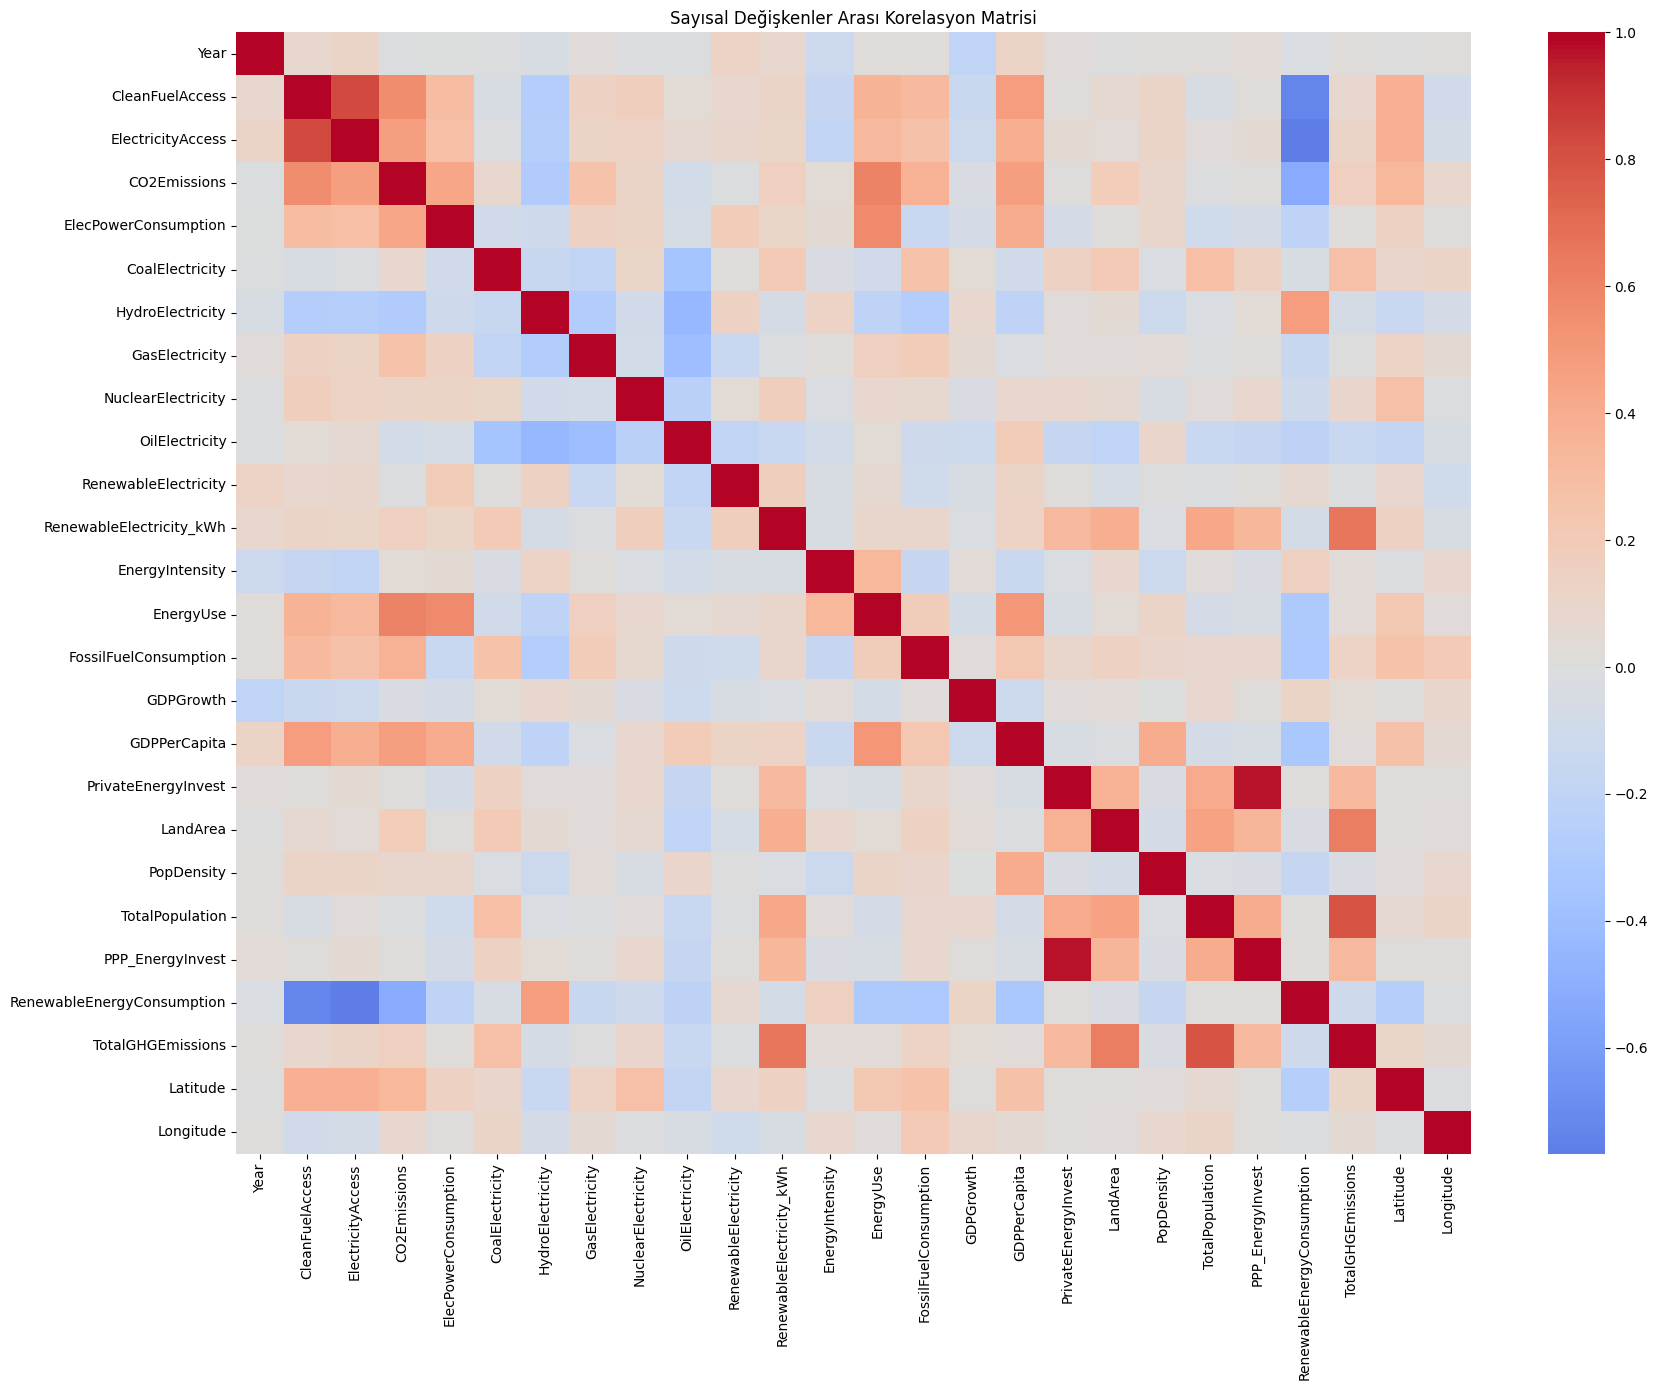

In [ ]:
# Korelasyon matrisi için yalnızca sayısal sütunları alalım
numeric_df = df.select_dtypes(include='number')

# Korelasyon matrisini hesapla
corr_matrix = numeric_df.corr()

# Görselleştir
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.tight_layout()
plt.show()

Year sütununda 0 aykırı değer bulundu.
CleanFuelAccess sütununda 0 aykırı değer bulundu.
ElectricityAccess sütununda 287 aykırı değer bulundu.
CO2Emissions sütununda 216 aykırı değer bulundu.
ElecPowerConsumption sütununda 264 aykırı değer bulundu.
CoalElectricity sütununda 458 aykırı değer bulundu.
HydroElectricity sütununda 0 aykırı değer bulundu.
GasElectricity sütununda 345 aykırı değer bulundu.
NuclearElectricity sütununda 877 aykırı değer bulundu.
OilElectricity sütununda 0 aykırı değer bulundu.
RenewableElectricity sütununda 594 aykırı değer bulundu.
RenewableElectricity_kWh sütununda 712 aykırı değer bulundu.
EnergyIntensity sütununda 377 aykırı değer bulundu.
EnergyUse sütununda 289 aykırı değer bulundu.
FossilFuelConsumption sütununda 0 aykırı değer bulundu.
GDPGrowth sütununda 283 aykırı değer bulundu.
GDPPerCapita sütununda 366 aykırı değer bulundu.
PrivateEnergyInvest sütununda 505 aykırı değer bulundu.
LandArea sütununda 542 aykırı değer bulundu.
PopDensity sütununda 470 

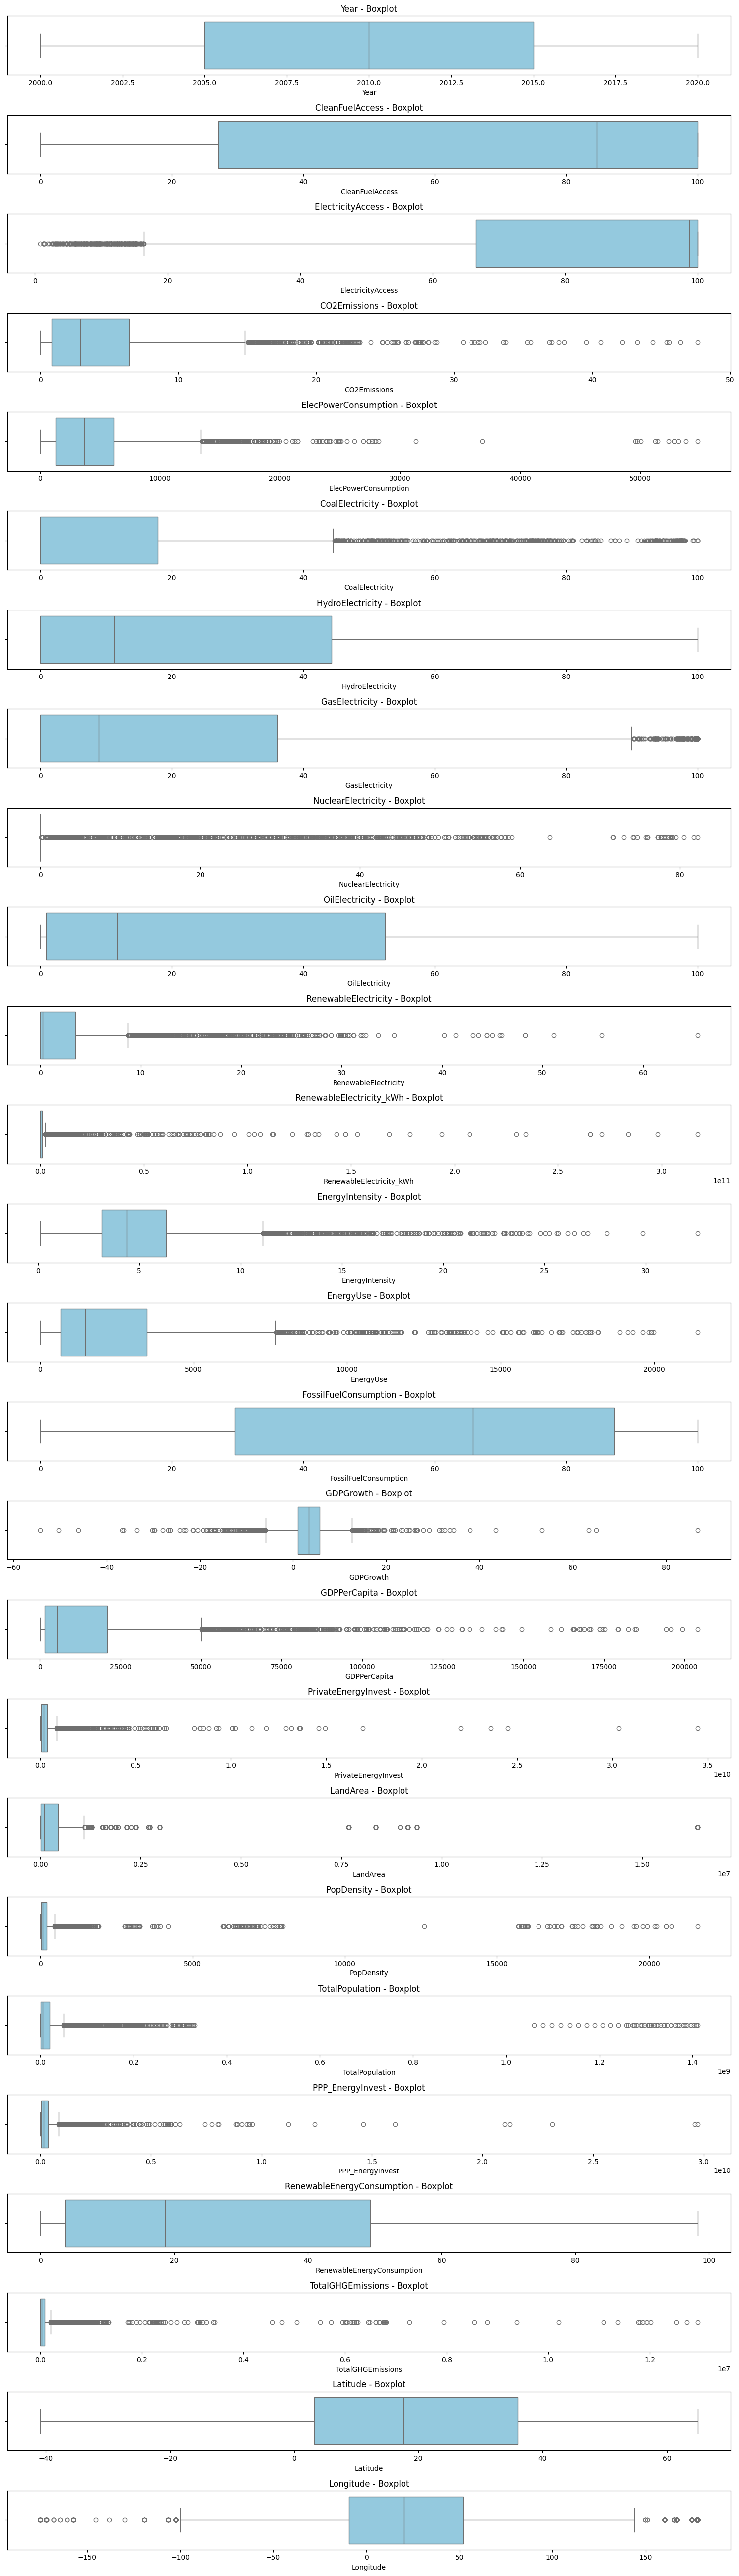

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aykırı değer tespiti fonksiyonu (IQR yöntemi)
def detect_outliers_iqr(df):
    outlier_indices = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices[col] = outliers.index.tolist()
        print(f"{col} sütununda {len(outliers)} aykırı değer bulundu.")
    return outlier_indices

# Görselleştirme fonksiyonu
def plot_outliers_boxplot(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, len(num_cols) * 2))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(len(num_cols), 1, i)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(f"{col} - Boxplot")
    plt.tight_layout()
    plt.show()

# Örnek kullanım:
# df = pd.read_csv("veriniz.csv")
outliers = detect_outliers_iqr(df)
plot_outliers_boxplot(df)


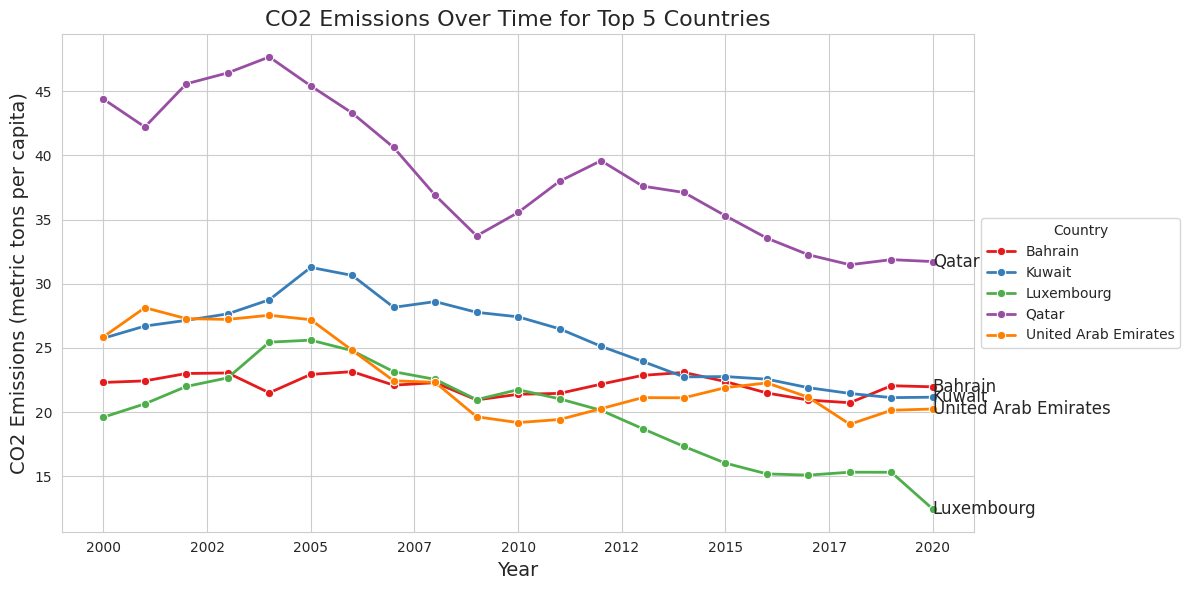

In [ ]:
# Find the top 5 countries with the highest CO2 emissions


top_5_countries = df.groupby('Country')['CO2Emissions'].mean().nlargest(5).index
df_top_5 = df[df['Country'].isin(top_5_countries)]

colors = sns.color_palette("Set1", n_colors=len(top_5_countries))

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(data=df_top_5, x='Year', y='CO2Emissions', hue='Country', palette=colors, lw=2, marker='o')

plt.title('CO2 Emissions Over Time for Top 5 Countries', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Emissions (metric tons per capita)', fontsize=14)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Country')


for country in top_5_countries:
    country_data = df_top_5[df_top_5['Country'] == country]
    x_values = country_data['Year'].values
    y_values = country_data['CO2Emissions'].values
    label_x = x_values[-1]
    label_y = y_values[-1]
    plt.text(label_x, label_y, country, fontsize=12, ha='left', va='center')

import matplotlib.ticker as ticker

plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.tight_layout()

plt.savefig('co2_emissions.png', dpi=300)  # Save as a high-resolution image
plt.show()

#Kümeleme (Clustering)

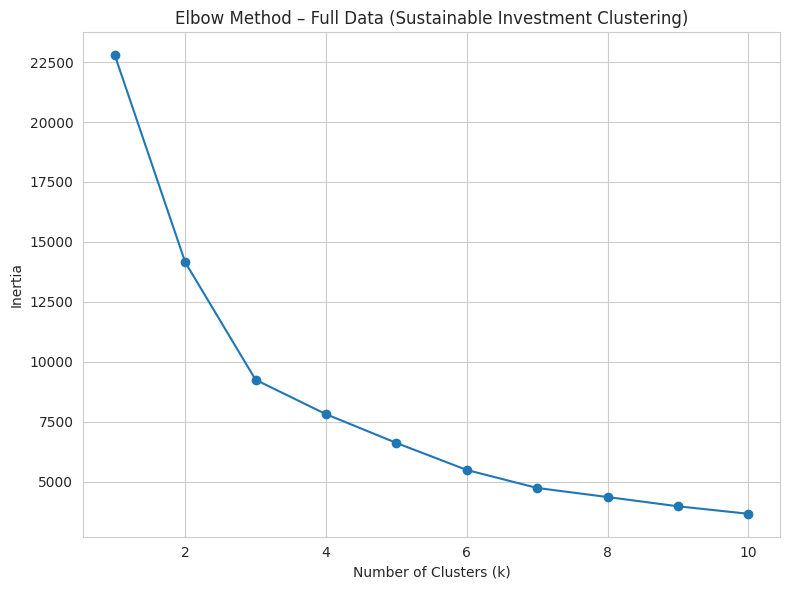

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Gerekli sütunları seç
selected_vars = ['ElectricityAccess', 'RenewableEnergyConsumption', 'GDPPerCapita', 'EnergyUse', 'CO2Emissions']
cluster_df = df[selected_vars].dropna()

# Standardize et
scaler = StandardScaler()
scaled_cluster_data = scaler.fit_transform(cluster_df)

# Elbow yöntemi
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_cluster_data)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method – Full Data (Sustainable Investment Clustering)")
plt.grid(True)
plt.tight_layout()
plt.show()



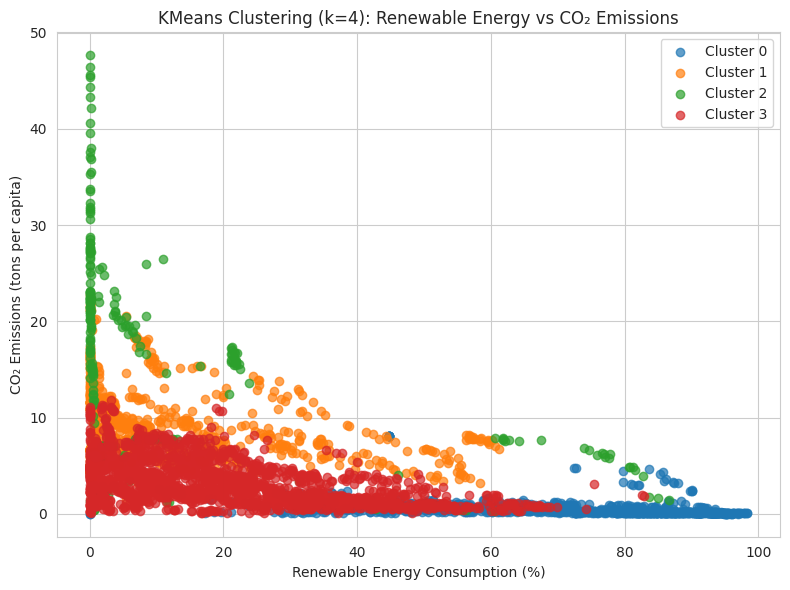

In [ ]:
# 1. Veriyi tekrar alalım ve eksik verileri çıkaralım
cluster_vars = ['ElectricityAccess', 'RenewableEnergyConsumption', 'GDPPerCapita', 'EnergyUse', 'CO2Emissions']
cluster_df = df[cluster_vars].dropna()

# 2. Veriyi standardize et
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# 3. KMeans modeli (k=4) ile kümeleme yap
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(scaled_data)

# 4. Görselleştirme için 2D scatter plot (RenewableEnergyConsumption vs CO2Emissions)
plt.figure(figsize=(8, 6))
colors = ['tomato', 'seagreen', 'royalblue', 'orange']
for cluster in sorted(cluster_df['Cluster'].unique()):
    subset = cluster_df[cluster_df['Cluster'] == cluster]
    plt.scatter(subset['RenewableEnergyConsumption'], subset['CO2Emissions'],
                label=f'Cluster {cluster}', alpha=0.7)

plt.title("KMeans Clustering (k=4): Renewable Energy vs CO₂ Emissions")
plt.xlabel("Renewable Energy Consumption (%)")
plt.ylabel("CO₂ Emissions (tons per capita)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Hangi faktörler karbon salımını artırıyor?

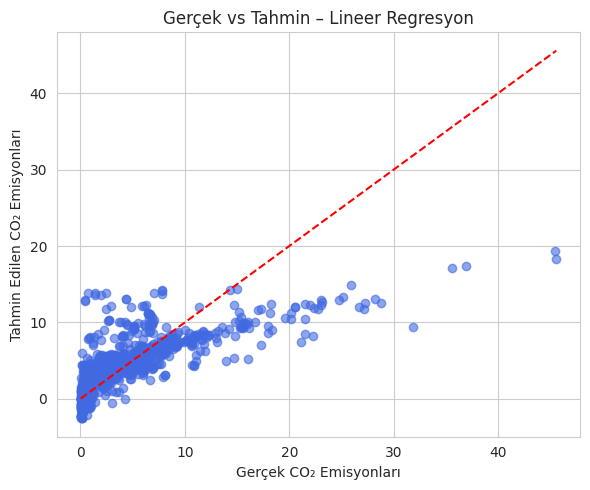

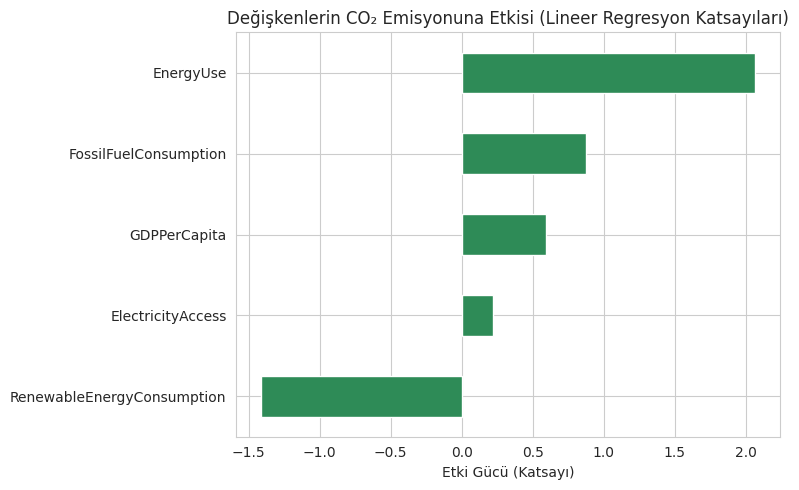

(0.5421604614683189,
 2.3368331630104926,
 np.float64(3.7731225406653417),
 EnergyUse                     2.065855
 FossilFuelConsumption         0.872224
 RenewableEnergyConsumption   -1.413783
 ElectricityAccess             0.221433
 GDPPerCapita                  0.592238
 dtype: float64)

In [ ]:
# CO2Emissions'ı tahmin etmek için kullanılabilecek özellikleri belirleyelim
features = ['EnergyUse', 'FossilFuelConsumption', 'RenewableEnergyConsumption',
            'ElectricityAccess', 'GDPPerCapita']
target = 'CO2Emissions'

# Gerekli verileri al ve eksik olanları çıkar
df_reg = df[features + [target]].dropna()

# Özellik ve hedef değişkenleri ayır
X = df_reg[features]
y = df_reg[target]

# Standardize edelim (görsel için daha net çizim sağlar)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test verisi
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model: Lineer Regresyon
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Performans metrikleri
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Katsayılar
coef_series = pd.Series(model.coef_, index=features)

# 1. Scatter plot: Gerçek vs Tahmin
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Gerçek CO₂ Emisyonları")
plt.ylabel("Tahmin Edilen CO₂ Emisyonları")
plt.title("Gerçek vs Tahmin – Lineer Regresyon")
plt.grid(True)
plt.tight_layout()
plt.savefig("lr_tahmin_grafiği.png", dpi=300)
plt.show()

# 2. Katsayıların etkisini gösteren bar plot
plt.figure(figsize=(8, 5))
coef_series.sort_values().plot(kind='barh', color='seagreen')
plt.title("Değişkenlerin CO₂ Emisyonuna Etkisi (Lineer Regresyon Katsayıları)")
plt.xlabel("Etki Gücü (Katsayı)")
plt.tight_layout()
plt.savefig("lr_degisken_onemi.png", dpi=300)
plt.show()

(r2, mae, rmse, coef_series)


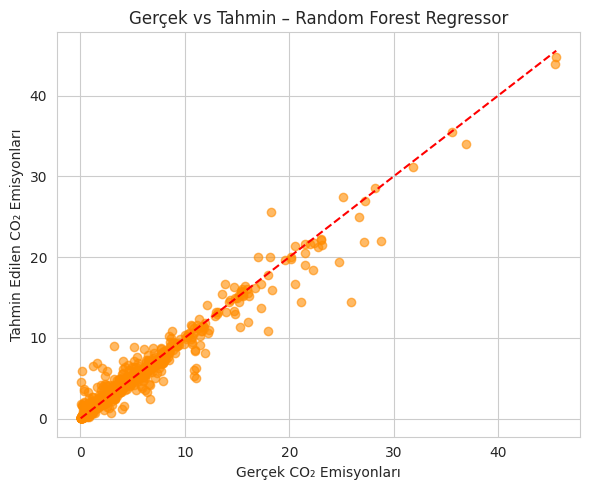

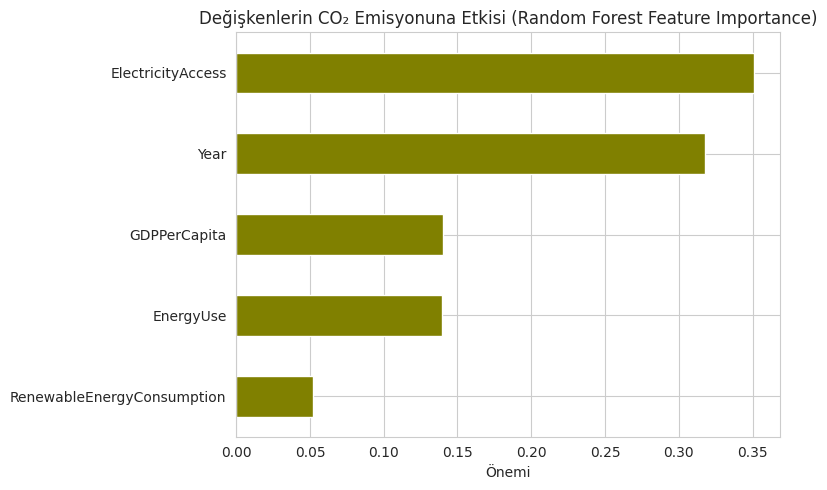

(0.9559050507474498,
 0.5605389461304848,
 np.float64(1.1709509036907833),
 ElectricityAccess             0.351079
 EnergyUse                     0.139432
 GDPPerCapita                  0.139987
 RenewableEnergyConsumption    0.051789
 Year                          0.317713
 dtype: float64)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor modeli
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Tahmin yap
y_pred_rf = rf_regressor.predict(X_test)

# Performans metrikleri
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Özellik önem dereceleri
feature_importance = pd.Series(rf_regressor.feature_importances_, index=features)

# 1. Gerçek vs Tahmin scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Gerçek CO₂ Emisyonları")
plt.ylabel("Tahmin Edilen CO₂ Emisyonları")
plt.title("Gerçek vs Tahmin – Random Forest Regressor")
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_tahmin_grafiği.png", dpi=300)
plt.show()

# 2. Özellik önem grafiği
plt.figure(figsize=(8, 5))
feature_importance.sort_values().plot(kind='barh', color='olive')
plt.title("Değişkenlerin CO₂ Emisyonuna Etkisi (Random Forest Feature Importance)")
plt.xlabel("Önemi")
plt.tight_layout()
plt.savefig("rf_degisken_onemi.png", dpi=300)
plt.show()

(r2_rf, mae_rf, rmse_rf, feature_importance)


#Logistic Regression yatırım tahmini

In [ ]:
# 1. Logistic Regression modeliyle tahmin yap ve tabloyu göster

df_log = df[['Country', 'Year', 'PrivateEnergyInvest', 'ElectricityAccess', 'EnergyUse',
             'GDPPerCapita', 'RenewableEnergyConsumption']].dropna()

df_log['InvestmentClass'] = pd.qcut(df_log['PrivateEnergyInvest'], q=3, labels=[0, 1, 2])

features = ['ElectricityAccess', 'EnergyUse', 'GDPPerCapita', 'RenewableEnergyConsumption', 'Year']
X = df_log[features]
y = df_log['InvestmentClass'].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_scaled, y)
y_pred_log = log_model.predict(X_scaled)

df_log['Tahmin'] = y_pred_log

logistic_prediction_table = df_log[['Country', 'Year', 'InvestmentClass', 'Tahmin']].sort_values(by='Year', ascending=False)

logistic_prediction_table.head(7)


,Country,Year,InvestmentClass,Tahmin
4556,Zimbabwe,2020.0,1,2
4535,Zambia,2020.0,2,1
20,Afghanistan,2020.0,1,2
2393,Libya,2020.0,2,0
4514,"Yemen, Rep.",2020.0,2,0
713,Cambodia,2020.0,1,1
3905,Sudan,2020.0,2,2


In [ ]:

df_log['DogruMu'] = df_log['InvestmentClass'].astype(int) == df_log['Tahmin']

dogru_sayi = df_log['DogruMu'].sum()
yanlis_sayi = len(df_log) - dogru_sayi
dogruluk_orani = dogru_sayi / len(df_log)

sinif_bazli_dogruluk = df_log.groupby('InvestmentClass').apply(
    lambda df: (df['InvestmentClass'].astype(int) == df['Tahmin']).mean()
)

hatali_ornekler = df_log[df_log['DogruMu'] == False][['Country', 'Year', 'InvestmentClass', 'Tahmin']].head(10)


sinif_df = sinif_bazli_dogruluk.reset_index()
sinif_df.columns = ['Yatırım Sınıfı', 'Doğruluk Oranı']
sinif_df['Doğruluk Oranı'] = (sinif_df['Doğruluk Oranı'] * 100).round(2).astype(str) + '%'
print(" Sınıf Bazlı Doğruluk Oranları:")
display(sinif_df)

hatali_df = hatali_ornekler.copy()
hatali_df.columns = ['Ülke', 'Yıl', 'Gerçek Sınıf', 'Tahmin Sınıfı']


print(" Hatalı Tahmin Edilen Ülkeler (İlk 10):")
display(hatali_df)


genel_df = pd.DataFrame({
    'Metrik': ['Doğru Tahmin Sayısı', 'Yanlış Tahmin Sayısı', 'Doğruluk Oranı'],
    'Değer': [dogru_sayi, yanlis_sayi, f"{dogruluk_orani:.2%}"]
})
display(genel_df)


 Sınıf Bazlı Doğruluk Oranları:


<ipython-input-110-87353da18276>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-110-87353da18276>:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Yatırım Sınıfı,Doğruluk Oranı
0,0,57.11%
1,1,28.19%
2,2,40.75%


 Hatalı Tahmin Edilen Ülkeler (İlk 10):


,Ülke,Yıl,Gerçek Sınıf,Tahmin Sınıfı
0,Afghanistan,2000.0,2,0
2,Afghanistan,2002.0,2,0
4,Afghanistan,2004.0,2,1
5,Afghanistan,2005.0,2,0
6,Afghanistan,2006.0,2,0
7,Afghanistan,2007.0,2,0
8,Afghanistan,2008.0,1,0
9,Afghanistan,2009.0,2,0
10,Afghanistan,2010.0,2,0
11,Afghanistan,2011.0,2,0


,Metrik,Değer
0,Doğru Tahmin Sayısı,1915
1,Yanlış Tahmin Sayısı,2642
2,Doğruluk Oranı,42.02%


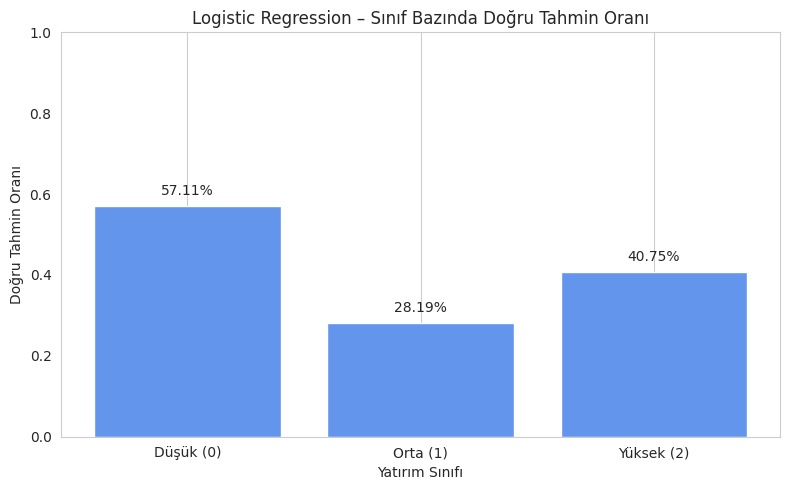

In [ ]:

plt.figure(figsize=(8, 5))
bars = plt.bar(sinif_bazli_dogruluk.index.astype(str), sinif_bazli_dogruluk.values, color='cornflowerblue')
plt.title("Logistic Regression – Sınıf Bazında Doğru Tahmin Oranı")
plt.ylabel("Doğru Tahmin Oranı")
plt.xlabel("Yatırım Sınıfı")
plt.ylim(0, 1)
plt.xticks(ticks=[0, 1, 2], labels=["Düşük (0)", "Orta (1)", "Yüksek (2)"], rotation=0)
plt.grid(axis='y')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f"{height:.2%}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
